<a href="https://colab.research.google.com/github/HeribertoGodoy/Tareas-EIE-401-/blob/main/Actividades/Actividad%205/Actividad_5_GodoyHeriberto_203197551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 5</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Heriberto Godoy</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


In [3]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 308, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 308 (delta 42), reused 59 (delta 14), pack-reused 219
Receiving objects: 100% (308/308), 10.78 MiB | 20.06 MiB/s, done.
Resolving deltas: 100% (136/136), done.


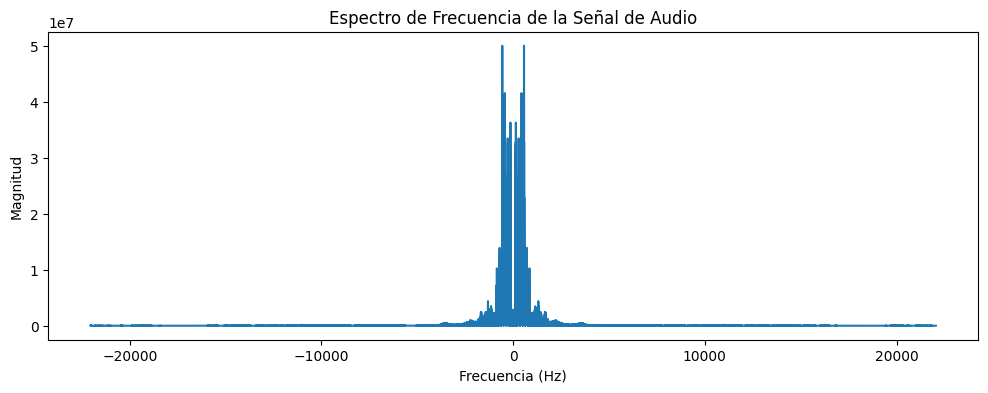

In [19]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

# Cargar archivo de audio
tasa_muestreo, datos = wavfile.read('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')

# Aplicar la Transformada Rápida de Fourier (FFT)
fft_datos = np.fft.fft(datos)

# Reorganizar los datos de la FFT para centrar el espectro de frecuencia
fft_datos_centrado = np.fft.fftshift(fft_datos)


# Crear una gráfica de la magnitud de la FFT centrada
plt.figure(figsize=(12, 4))
plt.plot(frecuencias_centrado, np.abs(fft_datos_centrado))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.title('Espectro de Frecuencia de la Señal de Audio')
plt.show()



## 2. Obtén el espectrograma de tu señal de audio

In [5]:
!pip install -qqq librosa

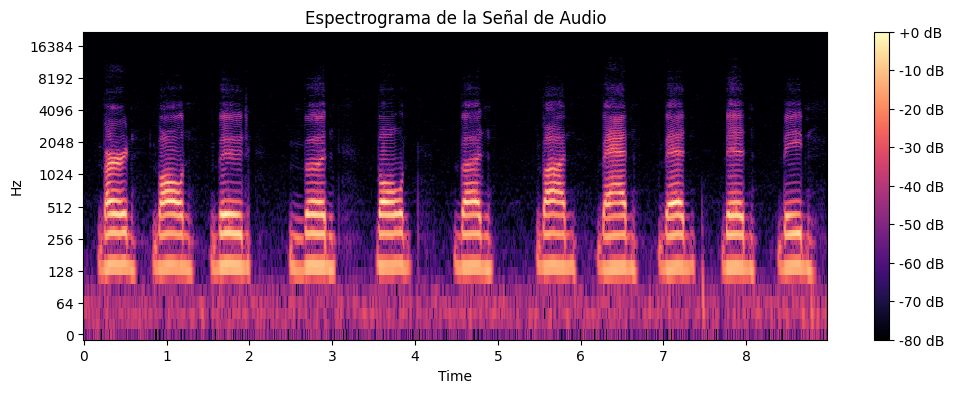

In [23]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# # Cargar archivo de audio y especificar la tasa de muestreo
x, sr = librosa.load('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav', sr=44100)

# x es la señal de audio y sr es la tasa de muestreo (44100 Hz en este caso)

# Convertir las amplitudes de la STFT a db para una mejor visualización.
D = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)

# Mostrar el espectrograma
plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
# Utilizamos librosa.display.specshow() para mostrar el espectrograma.
# Los ejes x e y para que representen el tiempo y las frecuencias respectivamente.

plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma de la Señal de Audio')
plt.show()


## 3. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

![image.png](attachment:image.png)

Numero de slices: 12


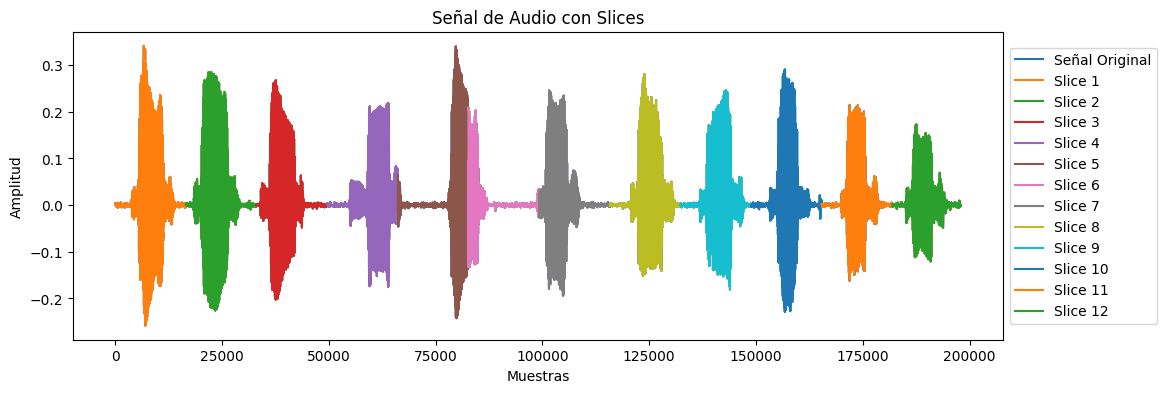

In [48]:
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Cargar archivo de audio
y, sr = librosa.load('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')

# Definir la longitud temporal de cada slice en segundos
longitud_slice = 1.5  # 1.5 segundos, se puede cambiar

# Calcular el número de muestras en cada slice
muestras_por_slice = int(longitud_slice * sr)

# Definir el overlap en número de muestras
overlap = int(0.5 * muestras_por_slice)  # 50% de overlap

# Crear una lista para almacenar los slices
slices = []

# Dividir la señal en slices con overlap
for i in range(0, len(y), muestras_por_slice - overlap):
    slice = y[i:i + muestras_por_slice]
    slices.append(slice)

# Crear una figura para visualizar la señal de audio con los slices
plt.figure(figsize=(12, 4))

# Dibujar la señal de audio original
plt.plot(y, label='Señal Original')

# Dibujar cada slice en un color diferente
for i, slice in enumerate(slices):
    plt.plot(range(i*(muestras_por_slice - overlap), i*(muestras_por_slice - overlap) + len(slice)), slice, label=f'Slice {i+1}')
print("Numero de slices:", len(slices))
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal de Audio con Slices')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Mover la leyenda fuera del área de trazado
plt.show()




In [46]:
from IPython.display import Audio

# Selecciona el slice que quieres escuchar
slice_seleccionado = slices[5]  # Cambia el índice para seleccionar un slice diferente

# Crea un reproductor de audio para el slice seleccionado
Audio(slice_seleccionado, rate=sr)


## 3.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


Número de slices: 12


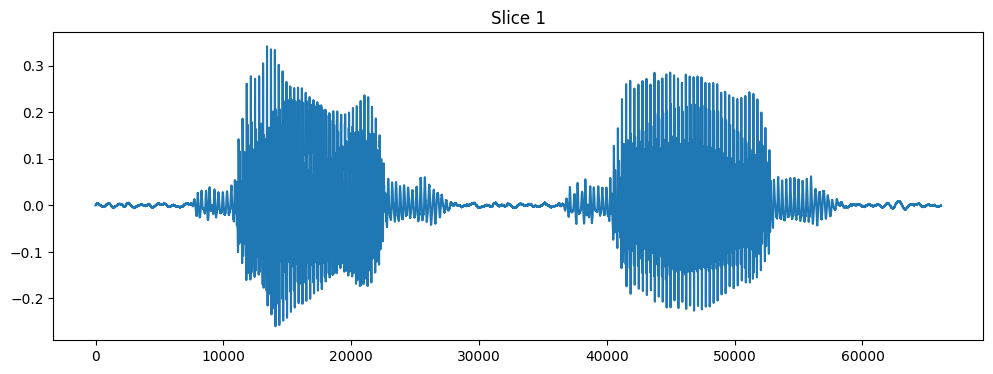

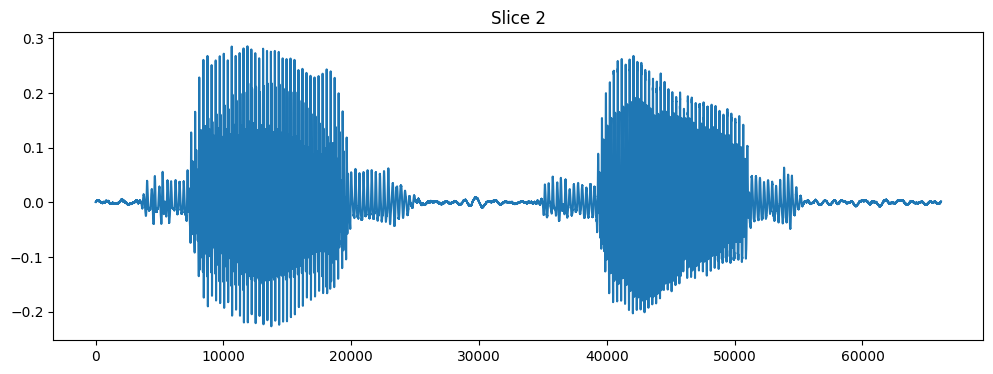

In [51]:
import torch
import torchaudio
import matplotlib.pyplot as plt
from IPython.display import Audio

# Cargar archivo de audio
waveform, sample_rate = torchaudio.load('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')

# Definir la longitud temporal de cada slice en segundos
longitud_slice = 1.5  # 1.5 segundos

# Calcular el número de muestras en cada slice
muestras_por_slice = int(longitud_slice * sample_rate)

# Definir el overlap en número de muestras
overlap = int(0.5 * muestras_por_slice)  # 50% de overlap

# Crear una lista para almacenar los slices
slices = []

# Dividir la señal en slices con overlap
for i in range(0, waveform.shape[1], muestras_por_slice - overlap):
    slice = waveform[:, i:i + muestras_por_slice]
    # Rellenar el slice con ceros si no tiene el tamaño correcto
    if slice.shape[1] < muestras_por_slice:
        padding = torch.zeros((1, muestras_por_slice - slice.shape[1]))
        slice = torch.cat((slice, padding), 1)
    slices.append(slice)

# Convertir la lista de slices a un tensor de PyTorch
slices_tensor = torch.stack(slices)

# Imprimir el número de slices
print("Número de slices:", len(slices))

# Graficar un par de slices
for i in range(2):
    plt.figure(figsize=(12, 4))
    plt.plot(slices[i].t().numpy())
    plt.title(f'Slice {i+1}')
    plt.show()

    # Reproducir el audio del slice
    display(Audio(slices[i].numpy(), rate=sample_rate))


## 4. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio.
Muestra un gráfico con la respuesta del filtro butterworth y explica el resultado.

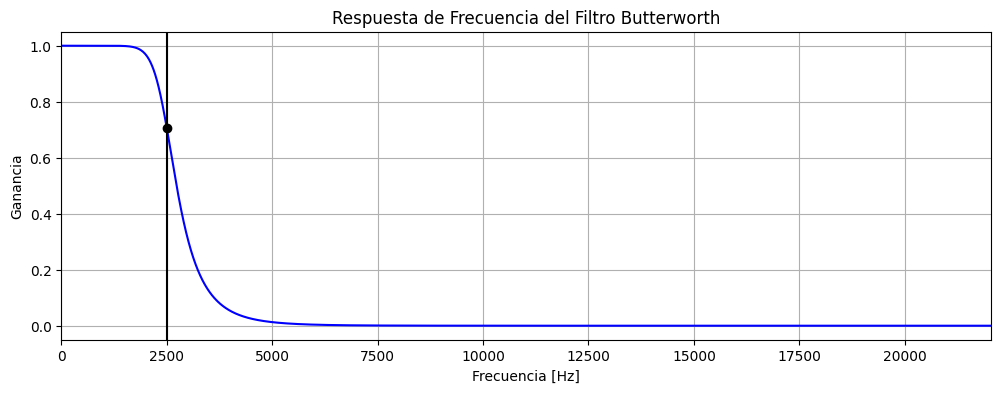

In [54]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Cargar archivo de audio
tasa_muestreo, datos = wavfile.read('/content/EIE_401_MULTIMEDIA/Ejemplos/Exercise2.7_adultmale_b_d2.wav')

# Normalizar los datos de audio
datos = datos / np.max(np.abs(datos))

# Definir la frecuencia de corte del filtro Butterworth (en Hz)
frec_corte = 2500 # 2500 Hz

# Definir el orden del filtro Butterworth
orden = 6

# Diseñar el filtro Butterworth
nyq = 0.5 * tasa_muestreo
frec_corte_norm = frec_corte / nyq
b, a = butter(orden, frec_corte_norm, btype='low', analog=False)

# Aplicar el filtro Butterworth a los datos de audio
datos_filtrados = lfilter(b, a, datos)

# Calcular la respuesta de frecuencia del filtro Butterworth
w, h = freqz(b, a, worN=8000)

# Crear una figura para visualizar la respuesta de frecuencia del filtro Butterworth
plt.figure(figsize=(12, 4))
plt.plot(0.5*tasa_muestreo*w/np.pi, np.abs(h), 'b')
plt.plot(frec_corte, 0.5*np.sqrt(2), 'ko')
plt.axvline(frec_corte, color='k')
plt.xlim(0, 0.5*tasa_muestreo)
plt.title("Respuesta de Frecuencia del Filtro Butterworth")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Ganancia')
plt.grid(True)
plt.show()


En el gráfico:

1.El eje x representa la frecuencia en Hertz (Hz). Va desde 0 hasta la mitad de la tasa de muestreo de la señal de audio (esto se conoce como la frecuencia de Nyquist).

2.El eje y representa la ganancia del filtro en esa frecuencia. La ganancia es la relación entre la amplitud de la salida y la amplitud de la entrada del filtro.

El gráfico muestra que el filtro Butterworth tiene una respuesta de frecuencia plana en la banda de paso (las frecuencias por debajo de la frecuencia de corte). Esto significa que estas frecuencias se mantienen sin cambios al pasar por el filtro.

La frecuencia de corte del filtro está marcada con una línea vertical negra en el gráfico. Esta es la frecuencia en la que la ganancia del filtro cae al 70.7% (o -3 dB) de la ganancia en la banda de paso. Para un filtro Butterworth de tipo ‘low’, todas las frecuencias por encima de la frecuencia de corte se atenúan (reducen en amplitud).

Después de la frecuencia de corte, la ganancia del filtro disminuye. Esto es lo que se conoce como la banda de parada del filtro. Las frecuencias en esta banda se atenúan más cuanto más altas son.

## 4. Referencias
<p align="justify">
    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html
